# load, resize and save images

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000


from tqdm import tqdm, tqdm_notebook

In [2]:
bignames = [
'Jan van Eyck',
'Sandro Botticelli',
'Leonardo da Vinci',
'Hieronymus Bosch',
'Albrecht Durer',
'Michelangelo',
'Raphael',
'Giuseppe Arcimboldo',
'Caravaggio',
'Diego Velazquez',
'Rembrandt',
'Johannes Vermeer',
'Francisco Goya',
'William Turner',
'William Turner',
'Jean-Francois Millet',
'John Everett Millais',
'Edouard Manet',
'Edgar Degas',
'Paul Cezanne',
'Claude Monet',
'Pierre-Auguste Renoir',
'Pieter Bruegel the Elder',
'Henri Rousseau',
'Paul Gauguin',
'Georges Seurat',
'Vincent van Gogh',
'Alphonse Mucha',
'Edvard Munch',
'Henri Matisse',
'Piet Mondrian',
'Paul Klee',
'Pablo Picasso',
'Georges Braque',
'Marc Chagall',
'Egon Schiele',
'Joan Miro',
'Mark Rothko',
'Salvador Dali',
'Jackson Pollock',
'Andy Warhol'
]

In [3]:
def load_each(bigname):
    root_dir = DATA_ROOT_DIR + bigname
    img_dirs = glob.glob(root_dir + "/*")
    imgs = []
    for d in img_dirs:
        img = Image.open(d)
        img = img.resize(IMG_SIZE)
        img = np.array(img)
        if img.ndim == 2:
            img = np.stack([img] * 3 ,axis = 2)
        if img.shape[2] == 4:
            img = img[:,:,:3]
        if img.shape[2] == 2:
            img = img[:,:,0]
            img = np.stack([img] * 3 ,axis = 2)
        imgs.append(img)
    return imgs

In [4]:
DATA_ROOT_DIR = "./artists/"

SIZE = 128
IMG_SIZE = (SIZE, SIZE)

In [5]:
xs = []
ys = []
for i, bigname in tqdm_notebook(enumerate(bignames)):
    print(bigname)
    imgs = load_each(bigname)
    imgs = np.stack(imgs, axis = 0).transpose(0,3,1,2)
    ys.append(np.ones(len(imgs)) * i)
    xs.append(imgs)

Jan van Eyck
Sandro Botticelli
Leonardo da Vinci
Hieronymus Bosch
Albrecht Durer
Michelangelo
Raphael
Giuseppe Arcimboldo
Caravaggio
Diego Velazquez
Rembrandt
Johannes Vermeer
Francisco Goya
William Turner
William Turner
Jean-Francois Millet
John Everett Millais
Edouard Manet
Edgar Degas
Paul Cezanne
Claude Monet
Pierre-Auguste Renoir
Pieter Bruegel the Elder
Henri Rousseau
Paul Gauguin
Georges Seurat
Vincent van Gogh
Alphonse Mucha
Edvard Munch
Henri Matisse
Piet Mondrian
Paul Klee
Pablo Picasso
Georges Braque
Marc Chagall
Egon Schiele
Joan Miro
Mark Rothko
Salvador Dali
Jackson Pollock
Andy Warhol



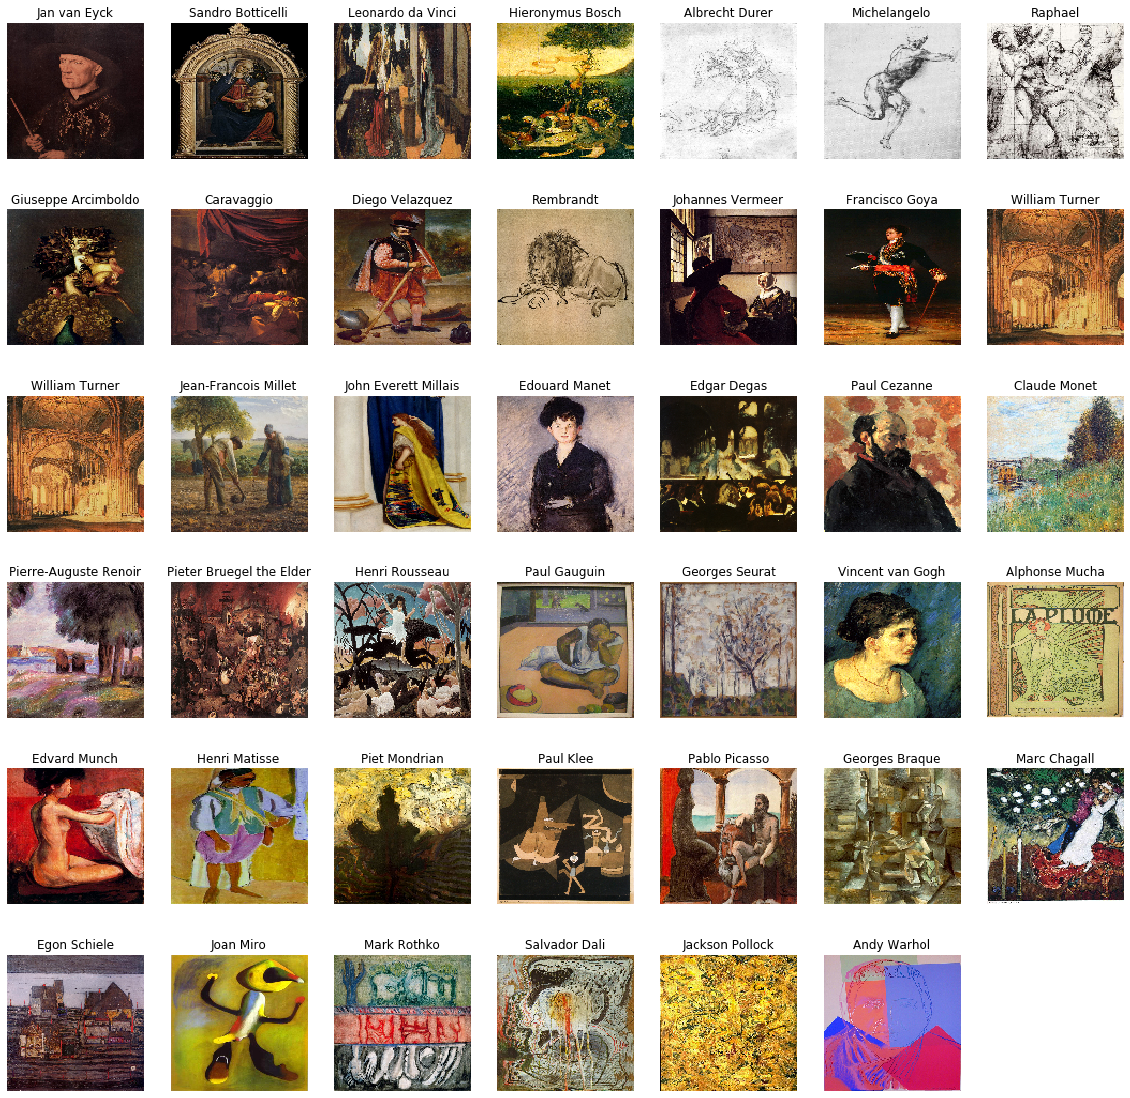

In [35]:
plt.figure(figsize=(20,20))
for k in range(len(bignames)):
    plt.subplot(6,7,k+1)
    plt.imshow(xs[k][0].transpose(1,2,0))
    plt.title(bignames[k])
    plt.axis("off")
plt.show()

In [6]:
x = np.concatenate(xs, axis = 0)
y = np.concatenate(ys, axis = 0)

In [7]:
pd.to_pickle({"x" : x, "y" : y}, "resized_data_{}.pkl".format(SIZE))